Tree population model

In [2]:
# import numpy
import numpy as np

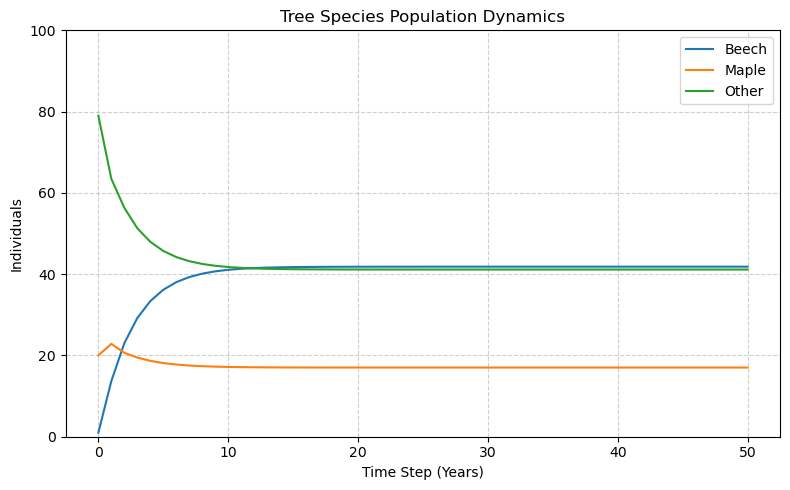

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- Initial population (Beech, Maple, Other) ---
n = np.array([1, 20, 79], dtype=float)

# --- Transition matrix (transposed version of your original) ---
# Rows = next year's species proportions
# Columns = current year's contributions
A = np.array([
    [0.8, 0.25, 0.1],   # Beech
    [0.1, 0.15, 0.25],  # Maple
    [0.1, 0.6, 0.65]    # Other
])

# --- Simulation settings ---
timesteps = 50
history = [n.copy()]

# --- Simulate population changes ---
for t in range(timesteps):
    n_next = A @ n
    # Cap total population at 100
    total = n_next.sum()
    if total > 100:
        n_next = n_next * (100 / total)
    history.append(n_next)
    n = n_next

# --- Convert history to numpy array for easier plotting ---
history = np.array(history)

# --- Plot results ---
years = np.arange(timesteps + 1)

plt.figure(figsize=(8, 5))
plt.plot(years, history[:, 0], label='Beech')
plt.plot(years, history[:, 1], label='Maple')
plt.plot(years, history[:, 2], label='Other')

plt.title('Tree Species Population Dynamics')
plt.xlabel('Time Step (Years)')
plt.ylabel('Individuals')
plt.ylim(0, 100)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [4]:
#calculate the total populatins of each species at the end of the simulation, round to whole numbers
final_populations = history[-1] .round().astype(int)
print("Final populations after", timesteps, "years:")
print("Beech:", final_populations[0])
print("Maple:", final_populations[1])
print("Other:", final_populations[2])


Final populations after 50 years:
Beech: 42
Maple: 17
Other: 41


In [5]:
# What is the probability that a randomly selected individual from this population at year 50 is a Maple?
prob_maple = final_populations[1] / final_populations.sum()
print("Probability of selecting a Maple at year 50:", prob_maple)

Probability of selecting a Maple at year 50: 0.17


Question 1
- Final populations after 50 years:
    - Beech: 42
    - Maple: 17
    - Other: 41

Question 2
- Probability of randomly selected inv being maple = 17%

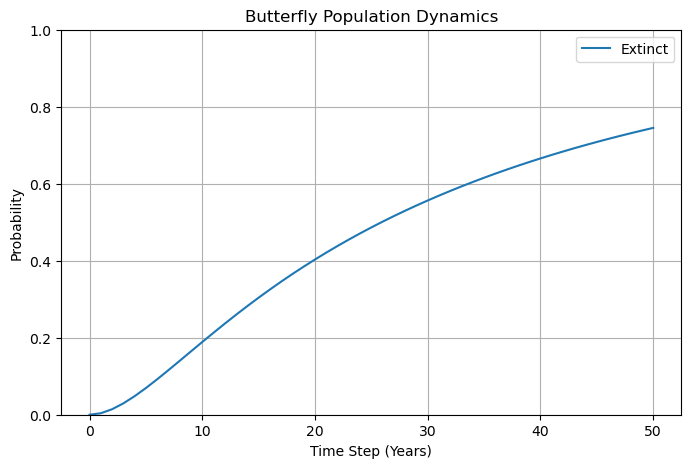

In [25]:
#create a matrix for 2 populations of butterfilys one smaller plot and one larger plot and the chance of them both going extinct. p= (o,o,o,1) and 
#A = [[1, 0.029, 0.13, 0.0039],[0, 0.95, 0.0026, 0.13], [0, 0.00060, 0.85, 0.026], [0, 0.019, 0.017, 0.84]] simulate for 50 time steps and plot the results

# --- Initial population (Small Plot, Large Plot) ---
n = np.array([0, 0, 0, 1], dtype=float)

# --- Transition matrix (transposed version of your original) ---
# Rows = at t
# Columns = t + 1
A = np.array([
    [1, 0.029, 0.13, 0.0039],   
    [0, 0.95, 0.0026, 0.13],  
    [0, 0.00060, 0.85, 0.026],
    [0, 0.019, 0.017, 0.84]    
])

# --- Simulation settings ---
timesteps = 50
history = [n.copy()]

# --- Simulate population changes ---
for t in range(timesteps):
    n_next = A @ n
    history.append(n_next)
    n = n_next

# --- Convert history to numpy array for easier plotting ---
history = np.array(history)

# --- Plot results ---
years = np.arange(timesteps + 1)
plt.figure(figsize=(8, 5))
plt.plot(years, history[:, 0], label='Extinct')
plt.title('Butterfly Population Dynamics')
plt.xlabel('Time Step (Years)')
plt.ylabel('Probability')
plt.grid(True)
plt.ylim(0, 1)
plt.legend()

Probability of metapopulation of butterflies going extinct after 50 years is 75%
- variables used
    - A = large plot
    - eA (change of extintion of A) = 3%
    - B = small plot
    - eB (chance of extnction of B) = 13%
    - CB (chance of recolonization if one plot goes extinct) = 2%
    - CA (chance of recolonization if one plot goes extinct) = 2%

In [26]:
#calculate the probability of extinction at the end of the simulation
final_extinction_probability = history[-1, 0]  
print("Probability of extinction after", timesteps, "years:", final_extinction_probability)


Probability of extinction after 50 years: 0.7450199719346144
